# Imports

In [1]:
import pandas as pd
import plotly as plt
import plotly.graph_objects as go

from IPython.display import clear_output
import nltk
import re
from collections import defaultdict, Counter
from string import punctuation

#stopwords em portugues
from nltk.corpus import stopwords
stopwords = set(stopwords.words('portuguese') + list(punctuation) + ['“','”'])

#funçao pra limpeza de texto
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case=False)

# Frequência de palavras chave relativa ao total de tweets em um dia

In [69]:
tweets = pd.read_csv('100k_user_text_date.csv')

In [71]:
tweets = tweets[['text', 'created_at', 'indice']]

#### Lista com os dias disponíveis

In [72]:
days = tweets['created_at'].unique().tolist()

## Tokenizando o texto

In [73]:
# funçao pra limpar texto e retirar stopwords
def tokenizar_texto(texto_tweet):
    texto_tokenizado = tweet_tokenizer.tokenize(texto_tweet)

    if texto_tokenizado[0] == "rt" and texto_tokenizado[1] == ":":
        del texto_tokenizado[0]
    
    palavras_sem_stopwords = [palavra for palavra in texto_tokenizado if palavra not in stopwords] 
    return palavras_sem_stopwords

In [74]:
tweets['text'] = tweets['text'].apply(lambda x: tokenizar_texto(x))

<ipython-input-74-87ef6260a379>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['text'] = tweets['text'].apply(lambda x: tokenizar_texto(x))


## Coletando o número de tweets por dia

In [58]:
tweets_per_day = {}

In [61]:
for day in days:
    dailytweets = tweets[tweets['created_at'] == day]
    tweets_per_day[day] = len(dailytweets)

## Número de tweets que, em um dia X, contém alguma das palavras na lista Y

In [104]:
def tweets_contain(keywords, day): # ESSA FUNÇÃO SÓ TRABALHA COM KEYWORDS EM LISTAS
    count = 0
    dailytweets = tweets[tweets['created_at'] == day]
    for i in dailytweets.index:
        for j in keywords:
            if j in dailytweets['text'][i]:
                count += 1
    return count

In [40]:
tweets.head()

,text,created_at
0,"[efeitos, quarentena, kkk]",2020-04-11
1,"[quarentena, acabou, pode, sair, casa]",2020-04-11
2,"[delegado, guerra, passou, comprador, zeng, qu...",2020-04-11
3,"[mood, dps, d, tds, shows, quarentena, qndo, v...",2020-04-11
4,"[perguntar, ofende, transforma, combate, coron...",2020-04-11


## Analisando frequências

In [87]:
tweets.head()

,text,created_at,indice
0,"[efeitos, quarentena, kkk]",2020-04-11,0
1,"[quarentena, acabou, pode, sair, casa]",2020-04-11,1
2,"[delegado, guerra, passou, comprador, zeng, qu...",2020-04-11,2
3,"[mood, dps, d, tds, shows, quarentena, qndo, v...",2020-04-11,3
4,"[perguntar, ofende, transforma, combate, coron...",2020-04-11,4


## Função que retorna dicionário da frequência relativa da ocorrência de palavras-chave por dia

In [123]:
def rel_freq(keywords):
    dict_relfreq = {}
    for day in days:
        freqs_per_day = {}
        freqs_per_day[day] = tweets_contain(keywords, day)
        dict_relfreq[day] = freqs_per_day[day]/tweets_per_day[day]
    return dict_relfreq

## Função que plota gráficos com a frequência de um conjunto X de palavras-chave

In [158]:
def plotgraph(keywords, aggregate=False):
    fig = go.Figure()
    fig.layout.yaxis.tickformat = ',.2%'
    if aggregate: # TRABALHA COM A FREQUÊNCIA SOMADA (SEM INTERCESSÕES SOBRESSALENTES)
        name = ''
        for i in range(len(keywords)):
            if i == len(keywords)-1:
                name +=keywords[i] + '.'
            elif i == len(keywords)-2:
                name += keywords[i] + ' e '
            else: 
                name += keywords[i] + ', '
        fig.add_trace(go.Scatter(x= days, y =list(rel_freq(keywords).values()), name=name))
    else: 
        for i in keywords:
            fig.add_trace(go.Scatter(x= days, y =list(rel_freq([i]).values()), name=i))
            
    if len(keywords) > 1:
        title = 'Ocorrência das palavras '
    else:
        title = 'Ocorrência da palavra '
    
    if aggregate:
        for i in range(len(keywords)):
            if i == len(keywords)-1:
                title += "\"" + keywords[i].capitalize() + "\""
            elif i == len(keywords)-2:
                title += "\"" + keywords[i].capitalize() + "\"" + ' ou '
            else: 
                title += "\"" + keywords[i].capitalize() + "\"" + ', '
    else:
        for i in range(len(keywords)):
            if i == len(keywords)-1:
                title += "\"" + keywords[i].capitalize() + "\""
            elif i == len(keywords)-2:
                title += "\"" + keywords[i].capitalize() + "\"" + ' e '
            else: 
                title += "\"" + keywords[i].capitalize() + "\"" + ', '
                
    title += ' em relação ao total de tweets'
                
    fig.update_layout(
        title=title,
        legend_title="Palavras:"
    )
        
    fig.show()


# "Coronavírus" e sinônimos:

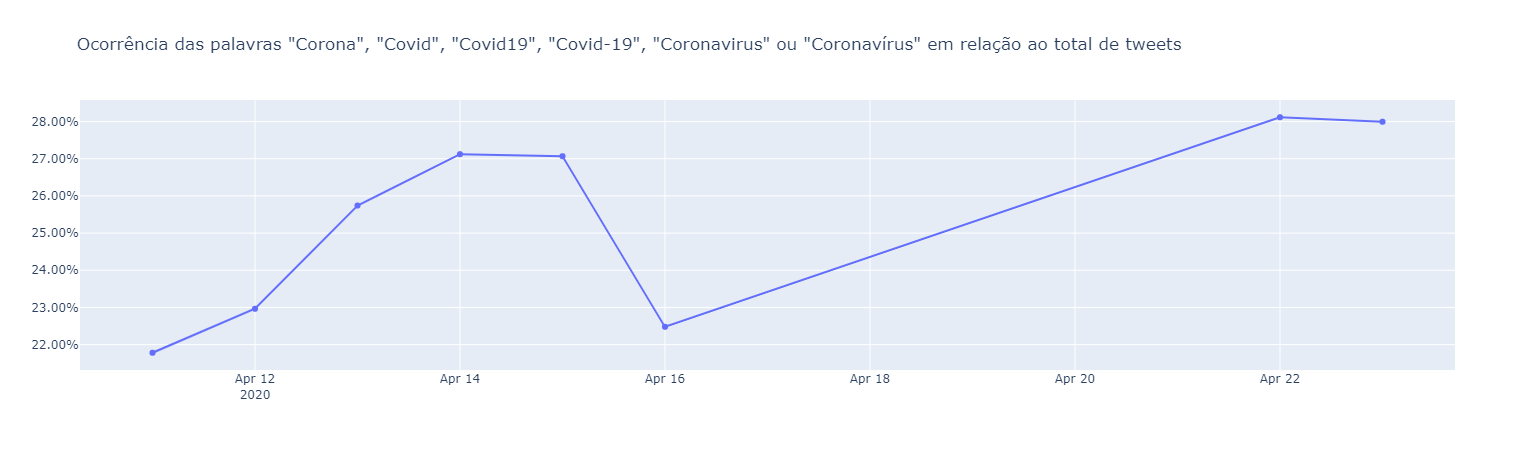

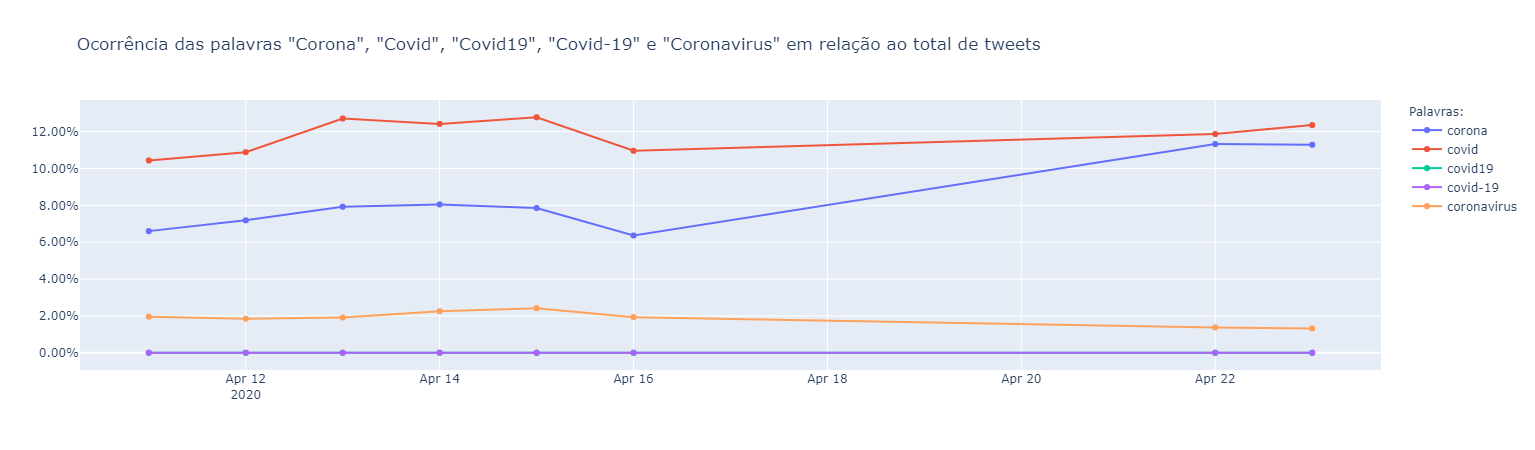

In [153]:
plotgraph(['corona', 'covid', 'covid19', 'covid-19', 'coronavirus', 'coronavírus'], True)
plotgraph(['corona', 'covid', 'covid19', 'covid-19', 'coronavirus'], False)

# "Quarentena" e "Confinamento"

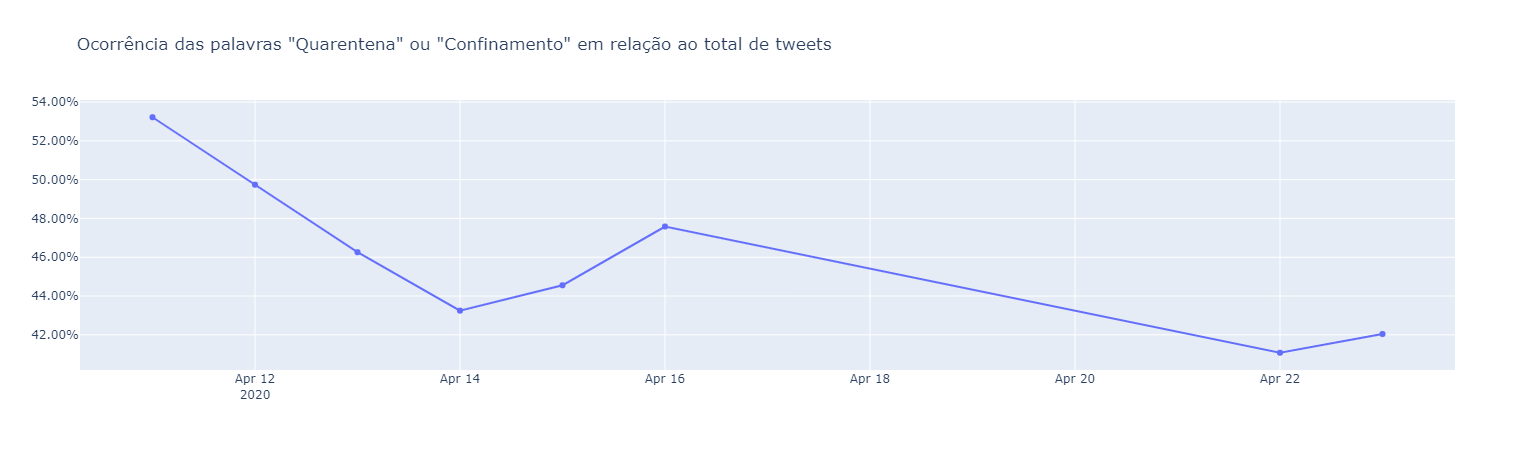

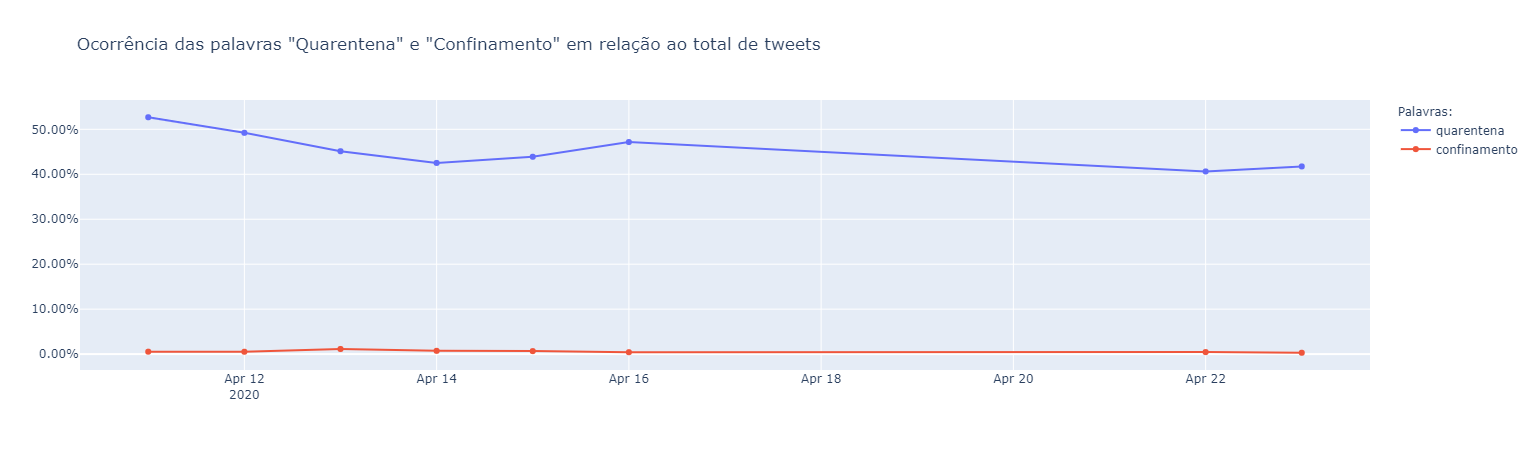

In [154]:
plotgraph(['quarentena', 'confinamento'], True)
plotgraph(['quarentena', 'confinamento'], False)

# "Hidroxicloroquina", "Cloroquina"

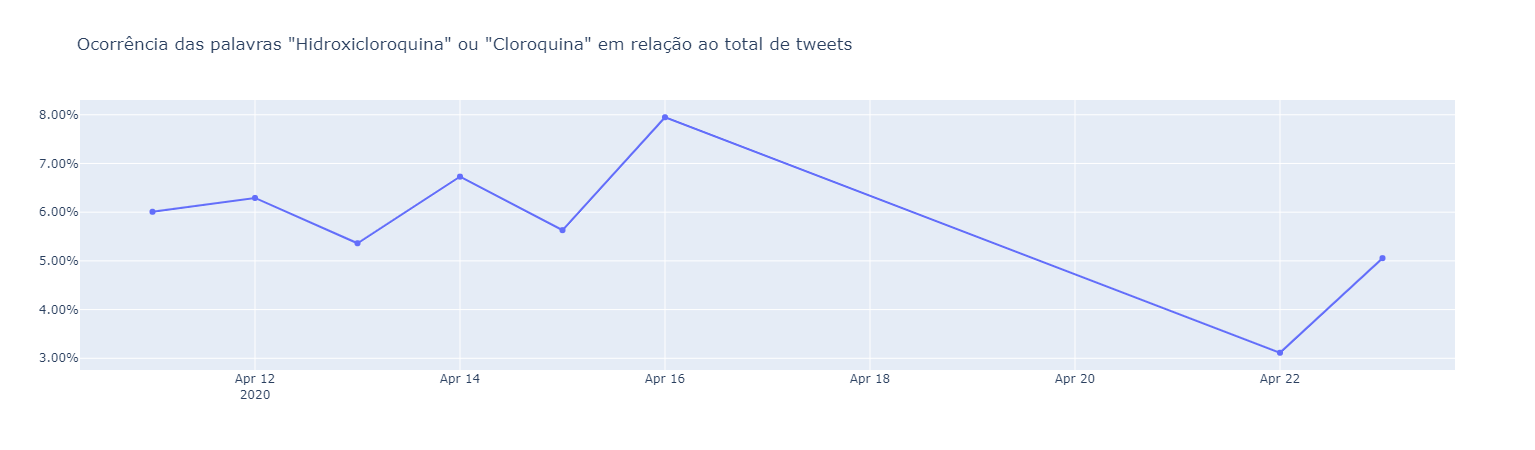

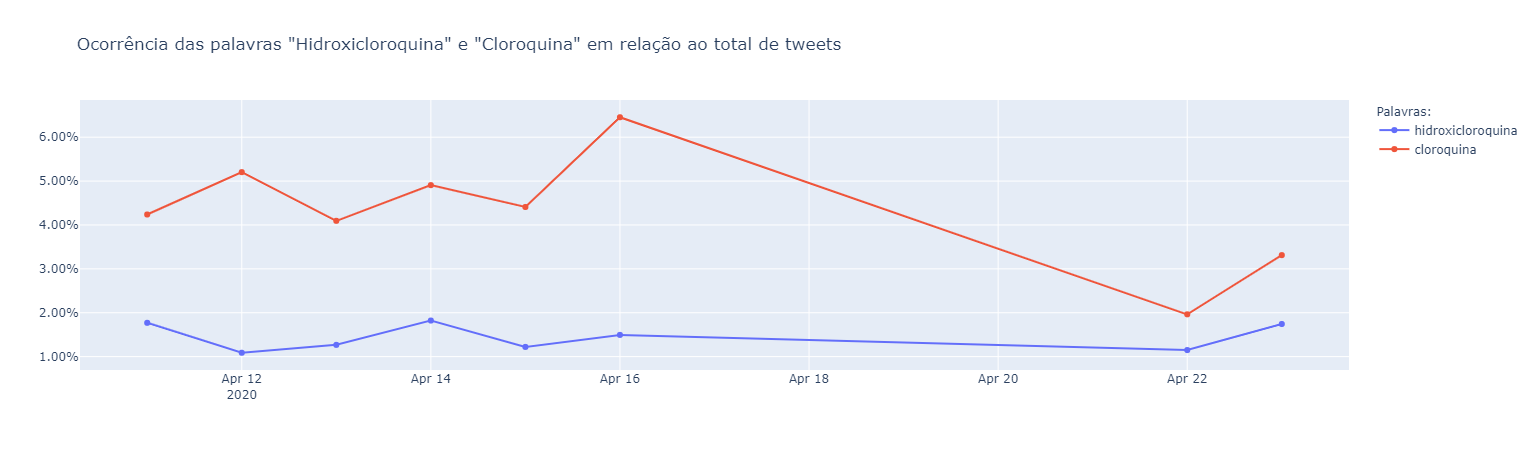

In [155]:
plotgraph(['hidroxicloroquina', 'cloroquina'], True)
plotgraph(['hidroxicloroquina', 'cloroquina'], False)

# "Distanciamento"

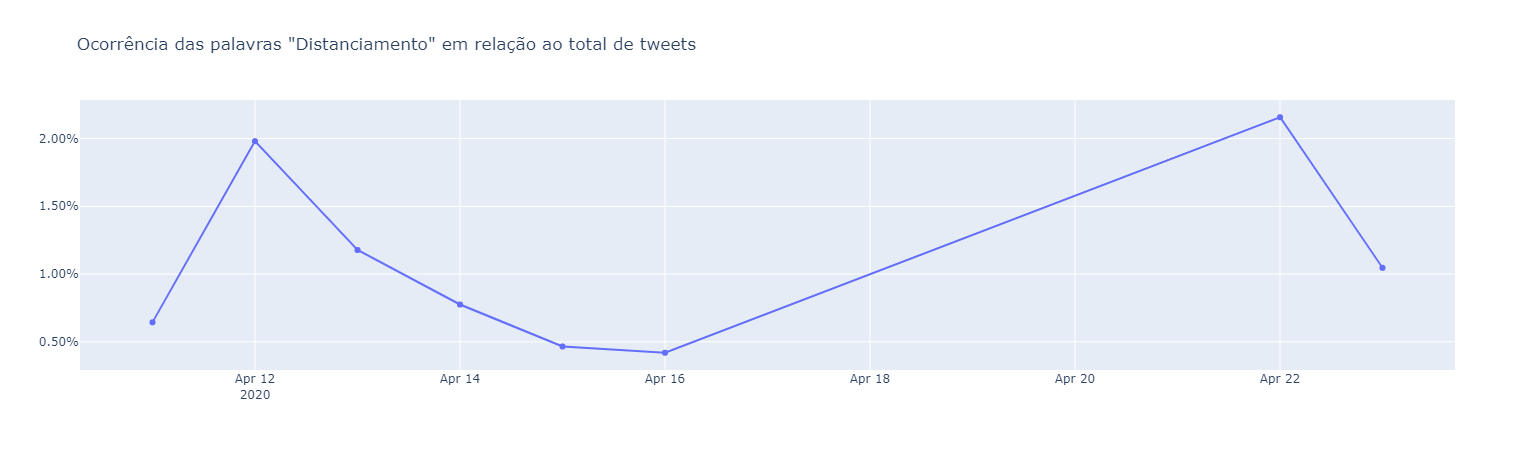

In [156]:
plotgraph(['distanciamento'])

# "Aglomeração", "Aglomerações"

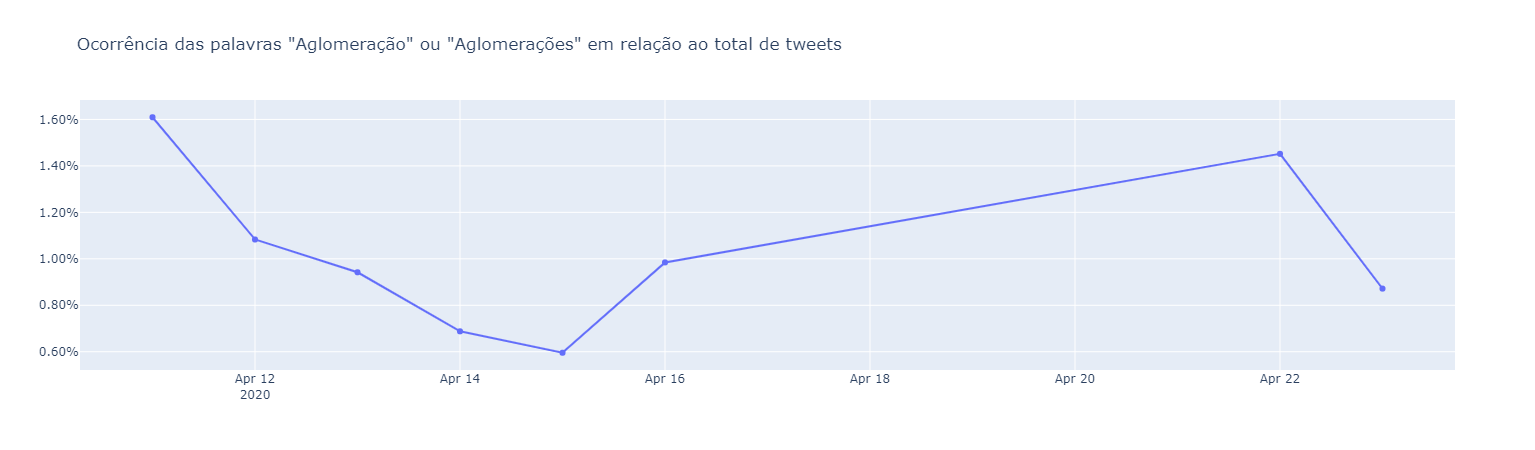

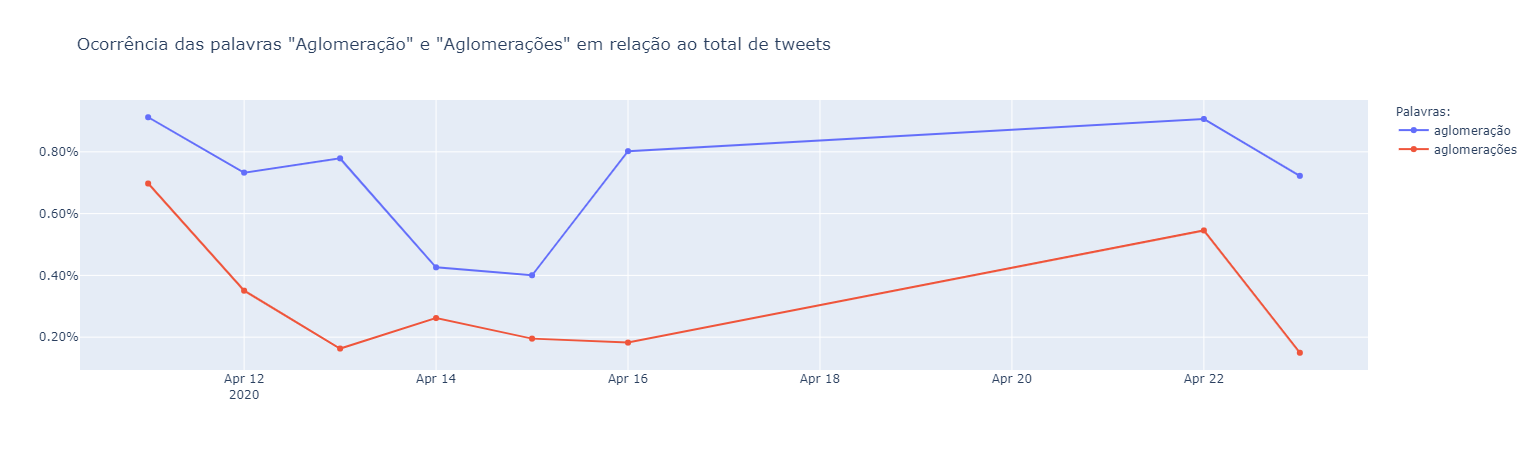

In [157]:
plotgraph(['aglomeração', 'aglomerações'], True)
plotgraph(['aglomeração', 'aglomerações'], False)